# Chapter 3: Introduction to Keras and TensorFlow

**Note**: TF and Numpy has a lot in common. However, Numpy can't retrieve the gradient of any differeintiable expression with respect to any of its input.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# User Gradient tape
input_var = tf.Variable(initial_value=3.0)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


2023-01-31 21:37:29.713682: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


# 1. End-to-end example: A linear classifier in pure Tensorflow
- Dataset: synthetic data from random distributon with a specific covariance matrix and mean.

## 1.1. Generate Dataset

In [3]:
# generate two classes of random points in a 2D plane.
num_samples_per_class = 1000

negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1,0.5], [0.5,1]],
    size=num_samples_per_class
)

positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1,0.5], [0.5,1]],
    size=num_samples_per_class
)

In [4]:
# stack two classes into an array
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [5]:
# generate the corresponding targets (0s and 1s)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"), # negative
                     np.ones((num_samples_per_class, 1), dtype="float32"))) # positive

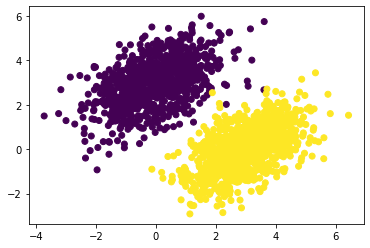

In [6]:
# plot data
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

## 1.2. Modeling

In [7]:
# create a simple linear classifier via TF (prediction = W*input + b)
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [8]:
# forward pass
def model(inputs):
    return tf.matmul(inputs, W) + b

In [9]:
# MSE loss function
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [10]:
# one training step function
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        # forward pass
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    
    # weights update
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [11]:
# (non-mini) batch training - more effective to reduce loss in training but will take longer. We will need fewer steps and larger training time
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 3.5969
Loss at step 1: 0.5289
Loss at step 2: 0.1859
Loss at step 3: 0.1347
Loss at step 4: 0.1205
Loss at step 5: 0.1115
Loss at step 6: 0.1038
Loss at step 7: 0.0968
Loss at step 8: 0.0905
Loss at step 9: 0.0847
Loss at step 10: 0.0794
Loss at step 11: 0.0746
Loss at step 12: 0.0702
Loss at step 13: 0.0662
Loss at step 14: 0.0625
Loss at step 15: 0.0592
Loss at step 16: 0.0562
Loss at step 17: 0.0534
Loss at step 18: 0.0509
Loss at step 19: 0.0486
Loss at step 20: 0.0465
Loss at step 21: 0.0445
Loss at step 22: 0.0428
Loss at step 23: 0.0412
Loss at step 24: 0.0397
Loss at step 25: 0.0384
Loss at step 26: 0.0372
Loss at step 27: 0.0361
Loss at step 28: 0.0351
Loss at step 29: 0.0342
Loss at step 30: 0.0333
Loss at step 31: 0.0326
Loss at step 32: 0.0319
Loss at step 33: 0.0312
Loss at step 34: 0.0307
Loss at step 35: 0.0301
Loss at step 36: 0.0296
Loss at step 37: 0.0292
Loss at step 38: 0.0288
Loss at step 39: 0.0284


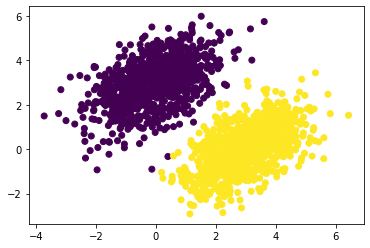

In [12]:
# let's plot out the prediction
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

**Note**: we can see that the prediction and the target is almost identical

## 1.3. Evaluate Model
Recall that the prediction value for a given point [x, y] is simply prediction == [[w1], [w2]] • [x, y] + b == w1 * x + w2 * y + b. Thus, class 0 is defined as w1 * x + w2 * y + b < 0.5, and class 1 is defined as w1 * x + w2 * y + b > 0.5. You’ll notice that what
you’re looking at is really the equation of a line in the 2D plane: w1 * x + w2 * y + b = 0.5

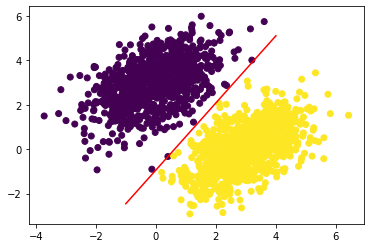

In [13]:
# generate 100 regular spaced numbers between -1 and 4
x = np.linspace(-1, 4, 100)

# line's equation
y = - W[0] / W[1] * x + (0.5 - b) / W[1]

# plot red line
plt.plot(x, y, "-r") 

# plot model's prediction on the same plot
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5) 